In [35]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import PyPDF2
import xml.etree.ElementTree as ET
from xml.dom import minidom
from nltk import sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats 

In [2]:
def get_sections(doc):
    sections = {}
    for elem in doc.getElementsByTagName('body')[0].getElementsByTagName('div'):
        attributes = elem.getElementsByTagName('head')[0].attributes
        if 'n' in dict(attributes):
            head = elem.getElementsByTagName('head')[0].firstChild.data
            
            text = ' '.join([' '.join([i.data if i.nodeType == i.TEXT_NODE else i.firstChild.data 
                             for i in j.childNodes]) if j.tagName != 'formula' else j.attributes['xml:id'].value
                   for j in elem.childNodes[1:]])
            
            sections[head] = text
            
    return sections

## Page Numbers' calculation

In [3]:
category_names = os.listdir('D:\Ani\Thesis\sciencePG')[:-1]
len(category_names)

12

In [4]:
categories = []
papers = []
page_nums = []
invalid_pdfs = []

for category in category_names:
    paper_names = os.listdir(os.path.join('D:\Ani\Thesis\sciencePG', category))
    print(category)
    for paper_name in tqdm(paper_names):
        if paper_name[-4:] != '.pdf':
            continue
        
        file_name = os.path.join('D:\Ani\Thesis\sciencePG', category, paper_name)
        
        with open(file_name, 'rb') as pdfFileObj:
            try:
                pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
                page_nums.append(pdfReader.numPages)
                
                categories.append(category)
                papers.append(paper_name)
            except:
                invalid_pdfs.append(file_name)

  0%|                                                                                           | 0/23 [00:00<?, ?it/s]

Artificial Intelligence


 10%|████████                                                                           | 3/31 [00:00<00:01, 26.07it/s]

Computer Science and Technology


  2%|█▍                                                                                | 2/116 [00:00<00:05, 19.88it/s]

Control and Intelligent Systems


  5%|████▎                                                                              | 2/39 [00:00<00:02, 17.13it/s]

Data Mining and Knowledge Discovery


  2%|██                                                                                 | 2/81 [00:00<00:05, 15.65it/s]

Data Science and Analysis


  3%|██▋                                                                                | 2/61 [00:00<00:03, 14.97it/s]

Data Science and Technology


  0%|                                                                                           | 0/35 [00:00<?, ?it/s]

Information Science and Technology


  3%|██▌                                                                                | 3/96 [00:00<00:04, 21.11it/s]

Intelligent Information Systems


  4%|███▍                                                                               | 2/49 [00:00<00:02, 18.88it/s]

Machine Learning Research


  5%|████▍                                                                              | 3/56 [00:00<00:02, 25.30it/s]

Mathematical and Computer Modelling


  3%|██▏                                                                                | 2/78 [00:00<00:04, 17.36it/s]

Mathematics and Computer Science


  5%|████▎                                                                              | 2/38 [00:00<00:02, 14.81it/s]

Neural Networks and Applications


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 20.45it/s]


In [5]:
dataset = pd.DataFrame({'category': categories, 'name': papers, 'num_pages': page_nums})
dataset.head()

,category,name,num_pages
0,Artificial Intelligence,A Comprehensive Review on Heart Disease Predic...,10
1,Artificial Intelligence,A Model for Clustering Social Media Data for E...,4
2,Artificial Intelligence,A Neural Network Scheme for Monetary Policy Ra...,11
3,Artificial Intelligence,A Neuro-Fuzzy Case Based Reasoning Framework f...,8
4,Artificial Intelligence,An Intelligent System for Traffic Control in S...,8


## Extracting Content from XML files

In [6]:
doc = minidom.parse('D:\Ani\Thesis\sciencePG\Mathematics and Computer Science\Mathematics_and_Computer_Science_xml\A Matrix Representation of an n-Person 0-1 Game and Its 0-1 Tail Algorithm to Find (Strictly) Pure Nash Equilibria.tei.xml')

In [ ]:
title = doc.getElementsByTagName('title')[0].firstChild.data
keywords = [child.firstChild.data for child in doc.getElementsByTagName('keywords')[0].getElementsByTagName('term')]
abstract = doc.getElementsByTagName('abstract')[0].getElementsByTagName('p')[0].firstChild.data
num_formulas = len(doc.getElementsByTagName('formula'))
num_figures = len(doc.getElementsByTagName('figure'))
section = get_sections(doc)

In [ ]:
title

In [ ]:
keywords

In [ ]:
abstract

In [ ]:
section['Introduction']

In [6]:
title_list = []
keywords_list = []
abstract_list = []
num_formulas_list = []
num_figures_list = []
sections_list = []

for row in tqdm(dataset.iterrows()):
    category = row[1]['category']
    pdf_name = row[1]['name']
    
    xml_name = pdf_name[:-3] + 'tei.xml'
    xml_path = os.path.join('D:\Ani\Thesis\sciencePG', category, category.replace(' ', '_') + '_xml', xml_name)
    
    try:
        doc = minidom.parse(xml_path)

        title = doc.getElementsByTagName('title')[0].firstChild.data
        keywords = [child.firstChild.data for child in doc.getElementsByTagName('keywords')[0].getElementsByTagName('term')]
        abstract = doc.getElementsByTagName('abstract')[0].getElementsByTagName('p')[0].firstChild.data
        
        num_formulas = len(doc.getElementsByTagName('formula'))
        num_figures = len(doc.getElementsByTagName('figure'))
        sections = get_sections(doc)
        
        title_list.append(title)
        sections_list.append(sections)
        keywords_list.append(keywords)
        abstract_list.append(abstract)
        num_formulas_list.append(num_formulas)
        num_figures_list.append(num_figures)
        
    except Exception as e:
        print(e)
        print(xml_path)
        title_list.append('error')
        keywords_list.append([])
        abstract_list.append('')
        num_formulas_list.append(0)
        num_figures_list.append(0)
        sections_list.append('')

29it [00:02, 19.34it/s]

[Errno 2] No such file or directory: 'D:\\Ani\\Thesis\\sciencePG\\Computer Science and Technology\\Computer_Science_and_Technology_xml\\Adaptive Neuro-Fuzzy Inference System (ANFIS) and Artificial Neural Network (ANN) for Predicting the Kinematic Viscosity and Density of Biodiesel-Petroleum Diesel Blends.tei.xml'
D:\Ani\Thesis\sciencePG\Computer Science and Technology\Computer_Science_and_Technology_xml\Adaptive Neuro-Fuzzy Inference System (ANFIS) and Artificial Neural Network (ANN) for Predicting the Kinematic Viscosity and Density of Biodiesel-Petroleum Diesel Blends.tei.xml


73it [00:05, 19.25it/s]

list index out of range
D:\Ani\Thesis\sciencePG\Control and Intelligent Systems\Control_and_Intelligent_Systems_xml\Analysis of the Development and Application of Salary Management System in China Railway Enterprises.tei.xml


372it [00:21, 22.62it/s]

[Errno 2] No such file or directory: 'D:\\Ani\\Thesis\\sciencePG\\Information Science and Technology\\Information_Science_and_Technology_xml\\Plasmid Profile Analysis and Curing of Multidrug-Resistant Bacteria Isolated from Hospital Environmental Surfaces in Akure Metropolis, Ondo State, Nigeria.tei.xml'
D:\Ani\Thesis\sciencePG\Information Science and Technology\Information_Science_and_Technology_xml\Plasmid Profile Analysis and Curing of Multidrug-Resistant Bacteria Isolated from Hospital Environmental Surfaces in Akure Metropolis, Ondo State, Nigeria.tei.xml
[Errno 2] No such file or directory: 'D:\\Ani\\Thesis\\sciencePG\\Information Science and Technology\\Information_Science_and_Technology_xml\\The Assessment of Practice and Challenges of Industries’ Participation in Implementation of Occupational Competency Assessment The Case of Addis Ababa City.tei.xml'
D:\Ani\Thesis\sciencePG\Information Science and Technology\Information_Science_and_Technology_xml\The Assessment of Practice a

434it [00:25, 19.72it/s]

[Errno 2] No such file or directory: 'D:\\Ani\\Thesis\\sciencePG\\Intelligent Information Systems\\Intelligent_Information_Systems_xml\\Information Accessibility and Utilization The Panacea to Job Performance and Productivity of Academic StaffIn the Faculties of Agricultural Sciences A Case Study.tei.xml'
D:\Ani\Thesis\sciencePG\Intelligent Information Systems\Intelligent_Information_Systems_xml\Information Accessibility and Utilization The Panacea to Job Performance and Productivity of Academic StaffIn the Faculties of Agricultural Sciences A Case Study.tei.xml


456it [00:26, 22.01it/s]

[Errno 2] No such file or directory: 'D:\\Ani\\Thesis\\sciencePG\\Intelligent Information Systems\\Intelligent_Information_Systems_xml\\Relationship between Human Characteristics and Adoption of Project Management Information System in Non-Governmental Organizations’ Projects in Nakuru Town (Kenya).tei.xml'
D:\Ani\Thesis\sciencePG\Intelligent Information Systems\Intelligent_Information_Systems_xml\Relationship between Human Characteristics and Adoption of Project Management Information System in Non-Governmental Organizations’ Projects in Nakuru Town (Kenya).tei.xml


533it [00:31, 15.49it/s]

[Errno 2] No such file or directory: 'D:\\Ani\\Thesis\\sciencePG\\Mathematical and Computer Modelling\\Mathematical_and_Computer_Modelling_xml\\Application of Multiple Linear Regression Technique to Predict Noise Pollution Levels and Their Spatial Patterns in the Tarkwa Mining Community of Ghana.tei.xml'
D:\Ani\Thesis\sciencePG\Mathematical and Computer Modelling\Mathematical_and_Computer_Modelling_xml\Application of Multiple Linear Regression Technique to Predict Noise Pollution Levels and Their Spatial Patterns in the Tarkwa Mining Community of Ghana.tei.xml


574it [00:35, 14.93it/s]

'Text' object has no attribute 'tagName'
D:\Ani\Thesis\sciencePG\Mathematics and Computer Science\Mathematics_and_Computer_Science_xml\A Note on Some Equivalences of Operators and Topology of Invariant Subspaces.tei.xml


674it [00:38, 27.47it/s]

[Errno 2] No such file or directory: 'D:\\Ani\\Thesis\\sciencePG\\Neural Networks and Applications\\Neural_Networks_and_Applications_xml\\Modeling and Optimization of Carbon Steel AISI 1045 Surface Roughness in CNC Turning Based on Response Surface Methodology and Heuristic Optimization Algorithms.tei.xml'
D:\Ani\Thesis\sciencePG\Neural Networks and Applications\Neural_Networks_and_Applications_xml\Modeling and Optimization of Carbon Steel AISI 1045 Surface Roughness in CNC Turning Based on Response Surface Methodology and Heuristic Optimization Algorithms.tei.xml


680it [00:38, 17.52it/s]


In [7]:
dataset['num_formulas'] = num_formulas_list
dataset['num_figures'] = num_figures_list
dataset['title'] = title_list
dataset['keywords'] = keywords_list
dataset['abstract'] = abstract_list
dataset['sections'] = sections_list

In [8]:
dataset

,category,name,num_pages,num_formulas,num_figures,title,keywords,abstract,sections
0,Artificial Intelligence,A Comprehensive Review on Heart Disease Predic...,10,0,0,A Comprehensive Review on Heart Disease Predic...,"[Data Mining, Machine Learning, Heart Disease,...",Heart disease is one of the major causes of li...,{'Introduction': 'The heart is one of the most...
1,Artificial Intelligence,A Model for Clustering Social Media Data for E...,4,0,4,A Model for Clustering Social Media Data for E...,"[Social Media, Twitter Application Programming...","Through Social media, people are able to write...",{'Introduction': 'Clustering is a descriptive ...
2,Artificial Intelligence,A Neural Network Scheme for Monetary Policy Ra...,11,13,9,A Neural Network Scheme for Monetary Policy Ra...,"[Monetary Policy, Artificial Neural Network, T...",This research work is an exploratory study tha...,{'Introduction': 'Monetary policy has been def...
3,Artificial Intelligence,A Neuro-Fuzzy Case Based Reasoning Framework f...,8,2,8,A Neuro-Fuzzy Case Based Reasoning Framework f...,"[Intelligence, Hybrid Model, Neuro-fuzzy CBR, ...",Lassa fever is an acute viral haemorrhagic fev...,{'Introduction': 'Expert Systems (ES) uses hum...
4,Artificial Intelligence,An Intelligent System for Traffic Control in S...,8,5,9,An Intelligent System for Traffic Control in S...,"[Smart Cities, Traffic Congestion, Intelligent...",Current traffic light systems use a fixed time...,"{'Introduction': '', 'Background': 'Traffic co..."
5,Artificial Intelligence,Architecture Trends of Adaptive Educational Hy...,14,0,12,Architecture Trends of Adaptive Educational Hy...,"[Adaptive Educational Hypermedia Systems, Arch...",The aim of this article is to present the gene...,{'Introduction': 'Adaptive Hypermedia Educatio...
6,Artificial Intelligence,Autonomous Systems and Reliability Assessment ...,6,0,2,Autonomous Systems and Reliability Assessment:...,"[Autonomous, Complex Systems, Components, Reli...",The advancement of technology has heralded nov...,{'Introduction': 'The advancement in technolog...
7,Artificial Intelligence,Defect Identification and Maturity Detection o...,10,0,15,Defect Identification and Maturity Detection o...,"[Defect Identification, Agriculture Image Proc...",The image processing and computer vision syste...,{'Introduction': 'Mango is one of the world's ...
8,Artificial Intelligence,Evaluation of Spatial Filtering Techniques in ...,6,8,16,Evaluation of Spatial Filtering Techniques in ...,"[Fundus Images, Spatial Filtering, MSE, PSNR, ...",The denoising of the fundus images is an essen...,{'Introduction': 'Early diagnosis is crucial i...
9,Artificial Intelligence,Implementation of Defense in Depth Strategy to...,6,0,5,Implementation of Defense in Depth Strategy to...,"[ICS, SCADA, Cybersecurity, IDS, IPS, Defense ...",The goal of this communication is to examine t...,{'Introduction': 'Industrial control systems (...


In [9]:
dataset = dataset[dataset.title != 'error']

In [11]:
dataset.shape

(671, 9)

In [12]:
num_sent_list = []

for row in tqdm(dataset.iterrows()):
    num_sent = len(sent_tokenize(row[1]['abstract']))
    sections = list(row[1]['sections'].values())
    for section in sections:
        num_sent += len(sent_tokenize(section))
    num_sent_list.append(num_sent)

671it [00:03, 199.69it/s]


In [13]:
dataset['num_sentences'] = num_sent_list

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:1]


In [14]:
dataset.head()

,category,name,num_pages,num_formulas,num_figures,title,keywords,abstract,sections,num_sentences
0,Artificial Intelligence,A Comprehensive Review on Heart Disease Predic...,10,0,0,A Comprehensive Review on Heart Disease Predic...,"[Data Mining, Machine Learning, Heart Disease,...",Heart disease is one of the major causes of li...,{'Introduction': 'The heart is one of the most...,337
1,Artificial Intelligence,A Model for Clustering Social Media Data for E...,4,0,4,A Model for Clustering Social Media Data for E...,"[Social Media, Twitter Application Programming...","Through Social media, people are able to write...",{'Introduction': 'Clustering is a descriptive ...,76
2,Artificial Intelligence,A Neural Network Scheme for Monetary Policy Ra...,11,13,9,A Neural Network Scheme for Monetary Policy Ra...,"[Monetary Policy, Artificial Neural Network, T...",This research work is an exploratory study tha...,{'Introduction': 'Monetary policy has been def...,174
3,Artificial Intelligence,A Neuro-Fuzzy Case Based Reasoning Framework f...,8,2,8,A Neuro-Fuzzy Case Based Reasoning Framework f...,"[Intelligence, Hybrid Model, Neuro-fuzzy CBR, ...",Lassa fever is an acute viral haemorrhagic fev...,{'Introduction': 'Expert Systems (ES) uses hum...,60
4,Artificial Intelligence,An Intelligent System for Traffic Control in S...,8,5,9,An Intelligent System for Traffic Control in S...,"[Smart Cities, Traffic Congestion, Intelligent...",Current traffic light systems use a fixed time...,"{'Introduction': '', 'Background': 'Traffic co...",99


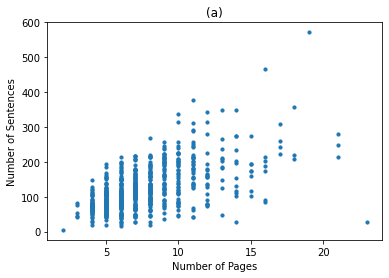

In [29]:
plt.xlabel('Number of Pages')
plt.ylabel('Number of Sentences')
plt.scatter(dataset.num_pages, dataset.num_sentences, s = 10)
#plt.savefig('page_vs_sentence.png')
plt.title('(a)')
plt.show()

In [26]:
sent_by_page = dataset.num_sentences.values / (dataset.num_pages.values - 1)
dataset['sent_by_page'] = sent_by_page

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:2]


(array([ 20.,  69., 137., 142., 150.,  86.,  35.,  22.,   7.,   3.]),
 array([ 1.22727273,  6.07121212, 10.91515152, 15.75909091, 20.6030303 ,
        25.4469697 , 30.29090909, 35.13484848, 39.97878788, 44.82272727,
        49.66666667]),
 <BarContainer object of 10 artists>)

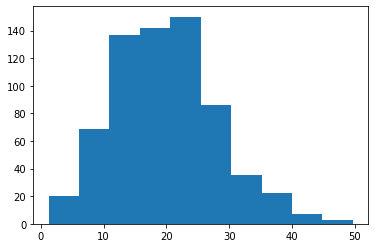

In [32]:
plt.hist(dataset['sent_by_page'])

In [17]:
np.mean(sent_by_page)

19.882930978122527

In [18]:
np.median(sent_by_page)

19.571428571428573

In [19]:
np.std(sent_by_page)

8.192452107787217

As per the empirical rule any absolute value of z-score above 3 is considered as an Outlier.

In [20]:
z_scores = stats.zscore(dataset[['num_formulas']])

#abs_z_scores = np.abs(z_scores)
filtered_entries = (z_scores < 0.5).all(axis=1)
new_df = dataset[filtered_entries]
outlier_df = dataset[~filtered_entries]


z_scores = stats.zscore(new_df[['sent_by_page']])

filtered_entries = (z_scores > -1.5).all(axis=1)
new_df_1 = new_df[filtered_entries]
outlier_df_1 = new_df[~filtered_entries]

In [320]:
new_df.shape

(537, 11)

In [321]:
new_df_1.shape

(510, 11)

In [42]:
new_df.category.value_counts()

Intelligent Information Systems        85
Control and Intelligent Systems        82
Data Science and Analysis              61
Data Science and Technology            54
Mathematics and Computer Science       45
Machine Learning Research              39
Data Mining and Knowledge Discovery    36
Neural Networks and Applications       31
Information Science and Technology     31
Mathematical and Computer Modelling    27
Computer Science and Technology        26
Artificial Intelligence                20
Name: category, dtype: int64

In [322]:
new_df_1.num_formulas.value_counts()

0     216
1      59
2      36
6      32
4      30
3      29
5      27
10     20
7      19
9      14
8      12
11     10
12      6
Name: num_formulas, dtype: int64

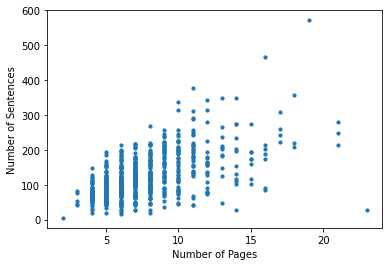

In [28]:
plt.xlabel('Number of Pages')
plt.ylabel('Number of Sentences')
plt.scatter(dataset.num_pages, dataset.num_sentences, s = 10)
#plt.savefig('page_vs_sentence.png')
plt.show()

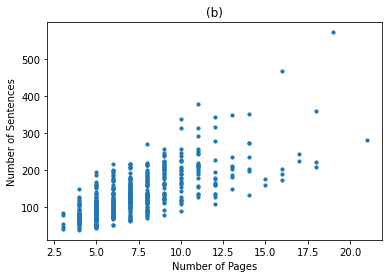

In [23]:
plt.xlabel('Number of Pages')
plt.ylabel('Number of Sentences')
plt.scatter(new_df_1.num_pages, new_df_1.num_sentences, s = 10)
#plt.savefig('page_vs_sentence.png')
plt.title('(b)')
plt.show()

In [326]:
new_df_1.to_csv('papers_dataset.csv', index = False)

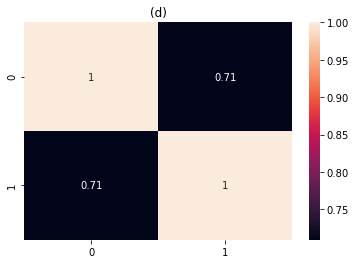

In [39]:
plt.title('(d)')
sn.heatmap(np.corrcoef(new_df_1.num_pages.values, new_df_1.num_sentences.values), annot = True);

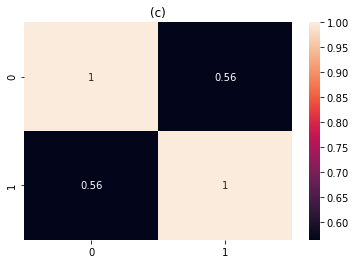

In [41]:
plt.title('(c)')
sn.heatmap(np.corrcoef(dataset.num_pages.values, dataset.num_sentences.values), annot = True);

## Statistical analysis

In [16]:
dataset.num_pages.mean()

7.707898658718331

In [17]:
dataset.num_pages.min()

2

In [18]:
dataset.num_pages.max()

23

In [19]:
dataset.groupby('category').size().reset_index(name='counts')

,category,counts
0,Artificial Intelligence,21
1,Computer Science and Technology,29
2,Control and Intelligent Systems,114
3,Data Mining and Knowledge Discovery,38
4,Data Science and Analysis,80
5,Data Science and Technology,60
6,Information Science and Technology,32
7,Intelligent Information Systems,93
8,Machine Learning Research,48
9,Mathematical and Computer Modelling,46


In [20]:
dataset.groupby('num_pages').size().reset_index(name='counts')

,num_pages,counts
0,2,1
1,3,5
2,4,58
3,5,106
4,6,108
5,7,105
6,8,81
7,9,55
8,10,46
9,11,35


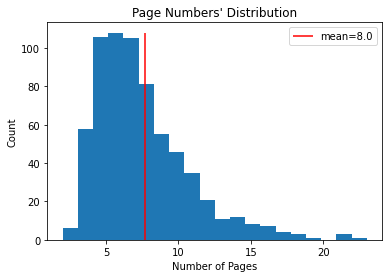

In [31]:
#plt.figure(figsize = (10, 8))
plt.hist(dataset.num_pages, bins = 20)
plt.vlines(dataset.num_pages.mean(), ymin = 0, ymax = 108, color = 'r', 
           label = f'mean={np.round(dataset.num_pages.mean())}')
plt.xlabel('Number of Pages')
plt.ylabel('Count')
plt.title("Page Numbers' Distribution")
plt.legend()
#plt.savefig('page_distribution.png')
plt.show()

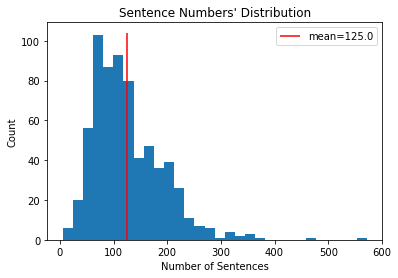

In [60]:
plt.hist(dataset.num_sentences, bins = 30)
plt.vlines(dataset.num_sentences.mean(), ymin = 0, ymax = 104, color = 'r', 
           label = f'mean={np.round(dataset.num_sentences.mean())}')
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.title("Sentence Numbers' Distribution")
plt.legend()
plt.savefig('sentence_distribution.png')
plt.show()